# The Spark Foundation - GRIP (Data Science and Business Analytics - JUN'22)

# Author - AMAN KUMAR SINGH

Task #4 Perform 'Exploratory Data Analysis' on dataset Global Terrorism

Importing The Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

Reading the file

In [2]:
terror=pd.read_csv("globalterrorim.csv",encoding='latin1')

C:\Users\Aman Kumar Singh\AppData\Local\Temp/ipykernel_17472/4018183335.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  terror=pd.read_csv("globalterrorim.csv",encoding='latin1')


In [3]:
terror.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
terror.shape

(181691, 135)

There are 135 columns and 181691 rows.

In [5]:
terror.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

Selecting The required Columns and Renaming Them

In [6]:
terror_new=terror[['iyear', 'imonth', 'iday','country_txt','region_txt','provstate', 'city','attacktype1_txt',
             'targtype1_txt','targsubtype1_txt','gname','weaptype1_txt','weapsubtype1_txt','nperps',
             'nkill','nwound','target1','motive']]

terrorr_new=(terror_new.rename(columns = {'iyear': 'year', 'imonth': 'month','iday':'day','country_txt':'country',
                                        'region_txt':'region','provstate':'state','attacktype1_txt':'attacktype',
                                        'targtype1_txt':'target','attacktype1_txt':'attacktype',
                                        'targsubtype1_txt':'targsubtype','gname':'group',
                                        'weaptype1_txt':'weapon','nperps':'perp','weapsubtype1_txt':'weaponsub',
                                        'nkill':'killed','nwound':'wounded'},inplace=True))

C:\Users\Aman Kumar Singh\AppData\Local\Temp/ipykernel_17472/3598158062.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  terrorr_new=(terror_new.rename(columns = {'iyear': 'year', 'imonth': 'month','iday':'day','country_txt':'country',


Creating a new column named 'Casualties' to calculate total killed and wounded

In [7]:
terror_new['Casualties']=terror_new['killed']+terror_new['wounded']

C:\Users\Aman Kumar Singh\AppData\Local\Temp/ipykernel_17472/1667724651.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  terror_new['Casualties']=terror_new['killed']+terror_new['wounded']


In [8]:
terror_new.shape

(181691, 19)

In [9]:
terror_new.dtypes

year             int64
month            int64
day              int64
country         object
region          object
state           object
city            object
attacktype      object
target          object
targsubtype     object
group           object
weapon          object
weaponsub       object
perp           float64
killed         float64
wounded        float64
target1         object
motive          object
Casualties     float64
dtype: object

In [10]:
terror_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   year         181691 non-null  int64  
 1   month        181691 non-null  int64  
 2   day          181691 non-null  int64  
 3   country      181691 non-null  object 
 4   region       181691 non-null  object 
 5   state        181270 non-null  object 
 6   city         181257 non-null  object 
 7   attacktype   181691 non-null  object 
 8   target       181691 non-null  object 
 9   targsubtype  171318 non-null  object 
 10  group        181691 non-null  object 
 11  weapon       181691 non-null  object 
 12  weaponsub    160923 non-null  object 
 13  perp         110576 non-null  float64
 14  killed       171378 non-null  float64
 15  wounded      165380 non-null  float64
 16  target1      181055 non-null  object 
 17  motive       50561 non-null   object 
 18  Casualties   164817 non-

Checking the missing values

In [11]:
terror_new.isnull().sum()

year                0
month               0
day                 0
country             0
region              0
state             421
city              434
attacktype          0
target              0
targsubtype     10373
group               0
weapon              0
weaponsub       20768
perp            71115
killed          10313
wounded         16311
target1           636
motive         131130
Casualties      16874
dtype: int64

Summary of all numerical data

In [12]:
terror_new.describe()

,year,month,day,perp,killed,wounded,Casualties
count,181691.000000,181691.000000,181691.000000,110576.000000,171378.000000,165380.000000,164817.000000
mean,2002.638997,6.467277,15.505644,-65.361154,2.403272,3.167668,5.296128
std,13.259430,3.388303,8.814045,216.536633,11.545741,35.949392,42.069023
min,1970.000000,0.000000,0.000000,-99.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,-99.000000,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,-99.000000,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,1.000000,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,25000.000000,1570.000000,8191.000000,9574.000000


Missing Values Treatment

In [13]:
print(terror_new['state'].mode())
print(terror_new['city'].mode())
print(terror_new['targsubtype'].mode())
print(terror_new['target1'].mode())
print(terror_new['motive'].mode())
print(terror_new['weaponsub'].mode())

0    Baghdad
Name: state, dtype: object
0    Unknown
Name: city, dtype: object
0    Unnamed Civilian/Unspecified
Name: targsubtype, dtype: object
0    Civilians
Name: target1, dtype: object
0    Unknown
Name: motive, dtype: object
0    Unknown Explosive Type
Name: weaponsub, dtype: object


In [14]:
terror_new['state']=terror_new['state'].fillna("Baghdad")
terror_new['city']=terror_new['city'].fillna("Unknown")
terror_new['targsubtype']=terror_new['targsubtype'].fillna("Unnamed Civilian/Unspecified")
terror_new['target1']=terror_new['target1'].fillna("Civilians")
terror_new['motive']=terror_new['motive'].fillna("Unknown")
terror_new['perp']=terror_new['perp'].fillna(terror_new['perp'].median())
terror_new['killed']=terror_new['killed'].fillna(terror_new['killed'].median())
terror_new['wounded']=terror_new['wounded'].fillna(terror_new['wounded'].median())
terror_new['Casualties']=terror_new['Casualties'].fillna(terror_new['Casualties'].median())
terror_new['weaponsub']=terror_new['weaponsub'].fillna("Unknown Explosive Type")

C:\Users\Aman Kumar Singh\AppData\Local\Temp/ipykernel_17472/2251888619.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  terror_new['state']=terror_new['state'].fillna("Baghdad")
C:\Users\Aman Kumar Singh\AppData\Local\Temp/ipykernel_17472/2251888619.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  terror_new['city']=terror_new['city'].fillna("Unknown")
C:\Users\Aman Kumar Singh\AppData\Local\Temp/ipykernel_17472/2251888619.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [15]:
terror_new.isnull().sum()

year           0
month          0
day            0
country        0
region         0
state          0
city           0
attacktype     0
target         0
targsubtype    0
group          0
weapon         0
weaponsub      0
perp           0
killed         0
wounded        0
target1        0
motive         0
Casualties     0
dtype: int64

Exploratory Data Analysis

In [16]:
print("Total Number of People Killed : ",terror_new['killed'].sum())
print("Total Casualties : ",terror_new['Casualties'].sum())

Total Number of People Killed :  411868.0
Total Casualties :  889766.0


YEAR WISE ANALYSIS

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.,
        16000., 18000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

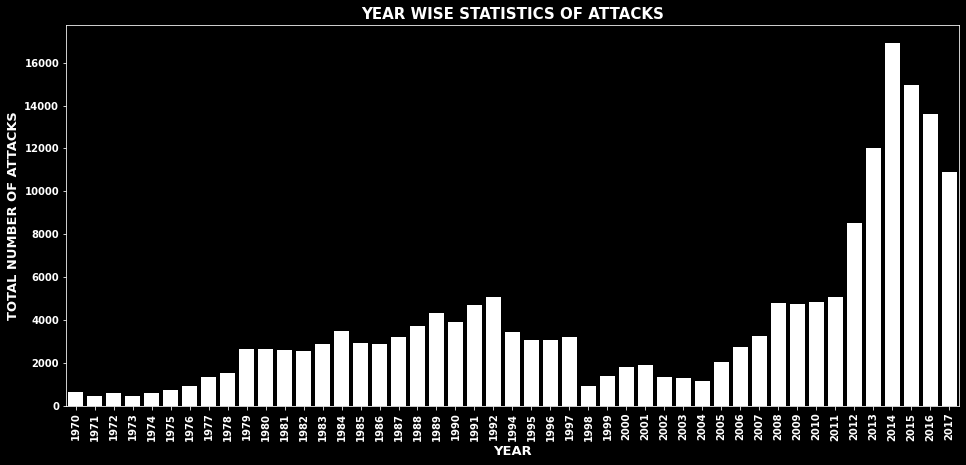

In [17]:
plt.style.use('dark_background')
plt.subplots(figsize=(16,7))
sns.countplot(terror_new['year'],color='white')
plt.xlabel("YEAR",fontdict={'color':"white","fontsize":13,'fontweight':'bold'})
plt.ylabel("TOTAL NUMBER OF ATTACKS",fontdict={'color':"white","fontsize":13,'fontweight':'bold'})
plt.title("YEAR WISE STATISTICS OF ATTACKS",fontdict={'color':"white","fontsize":15,'fontweight':'bold'})
plt.xticks(rotation=90,fontweight='bold')
plt.yticks(fontweight='bold')

There has been a gradual increase in terror activities since 2004 and reached the highest value in year 2014 and gradually decreased till 2017.

Spike in Terrorism in 2014:

In [18]:
year_2013=terror_new[terror_new['year']==2013]
year_2014=terror_new[terror_new['year']==2014]
print("Percentage Increase in terror attacks in 2014 over 2013 is ",round(((len(year_2014)-len(year_2013))/len(year_2013)*100),0),"%")

Percentage Increase in terror attacks in 2014 over 2013 is  40.0 %


(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

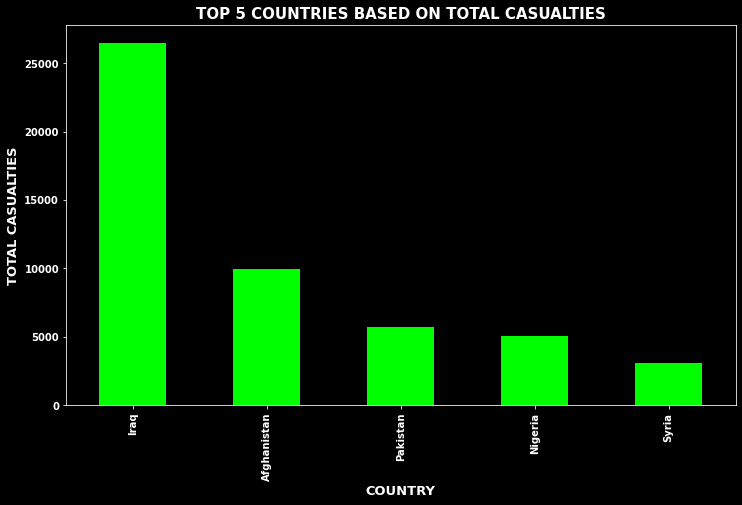

In [19]:
plt.style.use('dark_background')
year_2014.groupby(['country'])['Casualties'].sum().sort_values(ascending=False).head().plot.bar(color="#00FF00",figsize=(12,7))
plt.xlabel("COUNTRY",fontdict={'color':"white","fontsize":13,'fontweight':'bold'})
plt.ylabel("TOTAL CASUALTIES",fontdict={'color':"white","fontsize":13,'fontweight':'bold'})
plt.title("TOP 5 COUNTRIES BASED ON TOTAL CASUALTIES",fontdict={'color':"white","fontsize":15,'fontweight':'bold'})
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

The main reason for spike of Terrorism in 2014 is increase of attacks in Iraq, Afghanistan, Pakistan done by ISIL and Boko Haram

C:\Users\Aman Kumar Singh\AppData\Local\Temp/ipykernel_17472/2815839404.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  terror_new.groupby(['year'])['killed','wounded'].sum().plot.bar(stacked=True,color=['orange','pink'],figsize=(16,7))


(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.,
        80000., 90000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

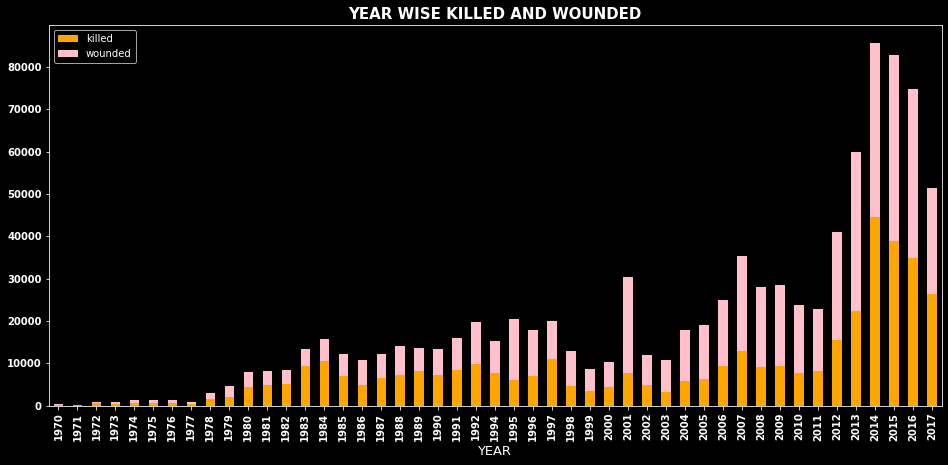

In [20]:
plt.style.use('dark_background')
terror_new.groupby(['year'])['killed','wounded'].sum().plot.bar(stacked=True,color=['orange','pink'],figsize=(16,7))
plt.xlabel("YEAR",fontdict={'color':"white","fontsize":13})
plt.title("YEAR WISE KILLED AND WOUNDED",fontdict={'color':"white","fontsize":15,'fontweight':'bold'})
plt.xticks(rotation=90,fontweight='bold')
plt.yticks(fontweight='bold')

The number of people killed almost doubled in 2014 compared to 2013 and number of casualities are very high from 2012 to 2017

COUNTRY WISE ANALYSIS

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

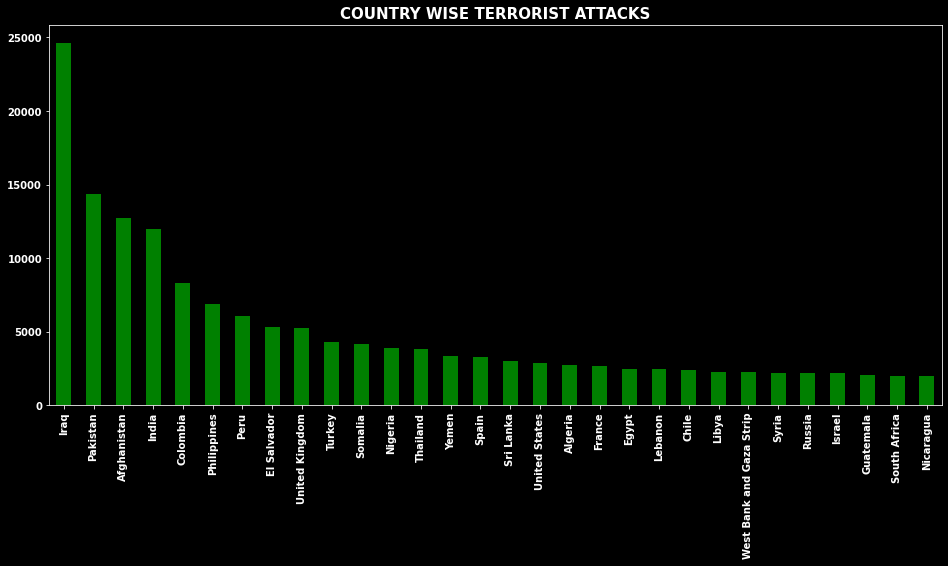

In [21]:
plt.style.use('dark_background')
terror_new['country'].value_counts().head(30).plot.bar(figsize=(16,7),color='green')
plt.title("COUNTRY WISE TERRORIST ATTACKS",fontdict={'color':"white","fontsize":15,'fontweight':'bold'})
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

Iraq , Pakistan , Afghanistan , India , Colombia are top 5 countries which faced highest number of Terrorist attacks during 1970-2017

(array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

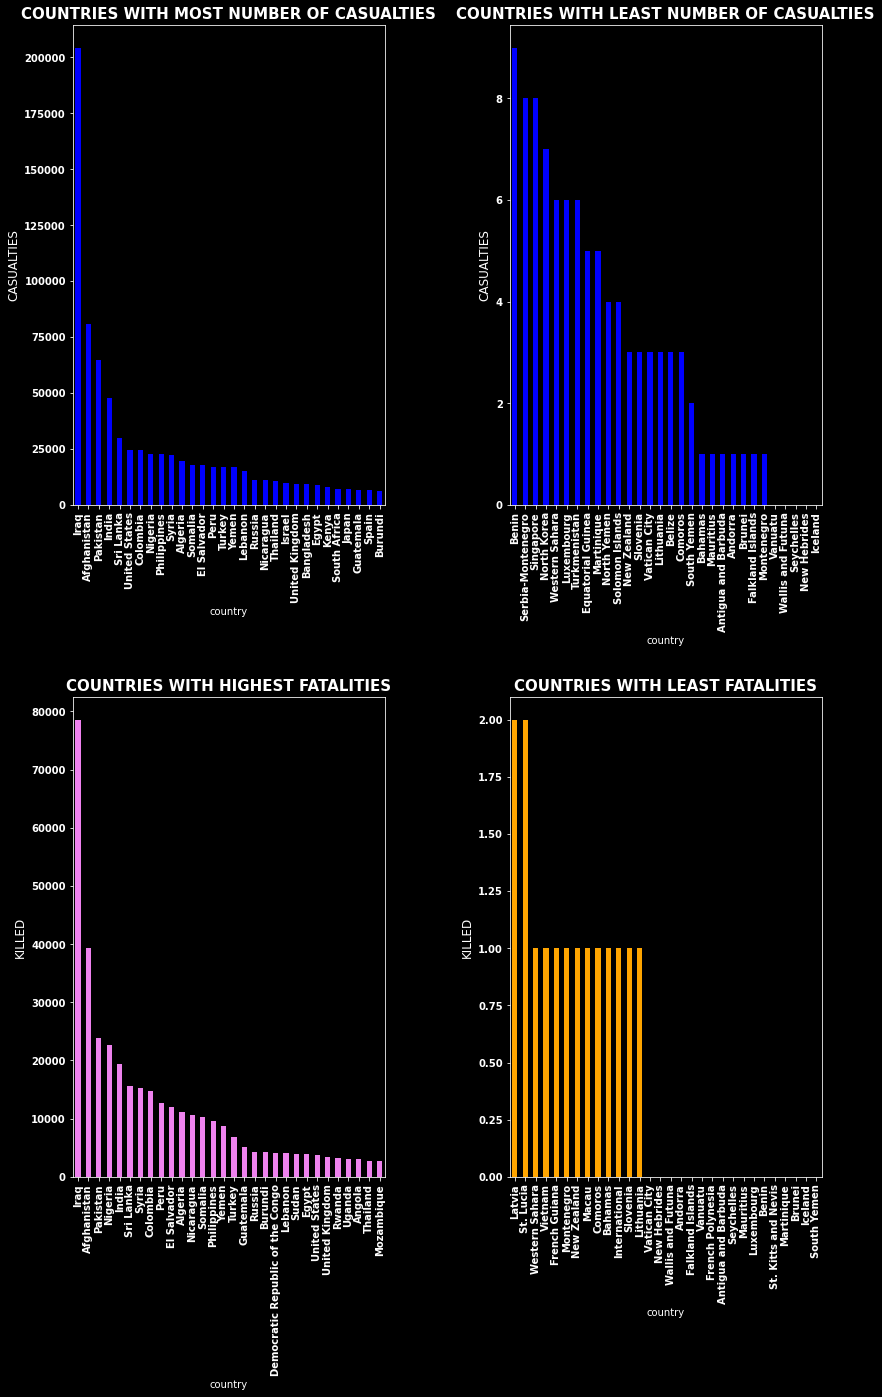

In [22]:
plt.subplots_adjust(left=0.1, bottom=0.1,  right=0.9,  top=0.9,  wspace=0.4,  hspace=0.4)
plt.style.use('dark_background')
plt.subplot(2,2,1)
terror_new.groupby(['country'])['Casualties'].sum().sort_values(ascending=False).head(30).plot.bar(figsize=(13,20),color='blue')
plt.ylabel("CASUALTIES",fontdict={'color':"white","fontsize":12})
plt.title("COUNTRIES WITH MOST NUMBER OF CASUALTIES",fontdict={'color':"white","fontsize":15,'fontweight':"bold"})
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.subplot(2,2,2)
terror_new.groupby(['country'])['Casualties'].sum().sort_values(ascending=False).tail(30).plot.bar(figsize=(13,20),color='blue')
plt.ylabel("CASUALTIES",fontdict={'color':"white","fontsize":12})
plt.title("COUNTRIES WITH LEAST NUMBER OF CASUALTIES",fontdict={'color':"white","fontsize":15,'fontweight':'bold'})
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.subplot(2,2,3)
terror_new.groupby(['country'])['killed'].sum().sort_values(ascending=False).head(30).plot.bar(figsize=(13,20),color='violet')
plt.ylabel("KILLED",fontdict={'color':"white","fontsize":12})
plt.title("COUNTRIES WITH HIGHEST FATALITIES",fontdict={'color':"white","fontsize":15,'fontweight':'bold'})
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.subplot(2,2,4)
terror_new.groupby(['country'])['killed'].sum().sort_values(ascending=False).tail(30).plot.bar(figsize=(13,20),color='orange')
plt.ylabel("KILLED",fontdict={'color':"white","fontsize":12})
plt.title("COUNTRIES WITH LEAST FATALITIES",fontdict={'color':"white","fontsize":15,'fontweight':'bold'})
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

CITY WISE ANALYSIS

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000., 8000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

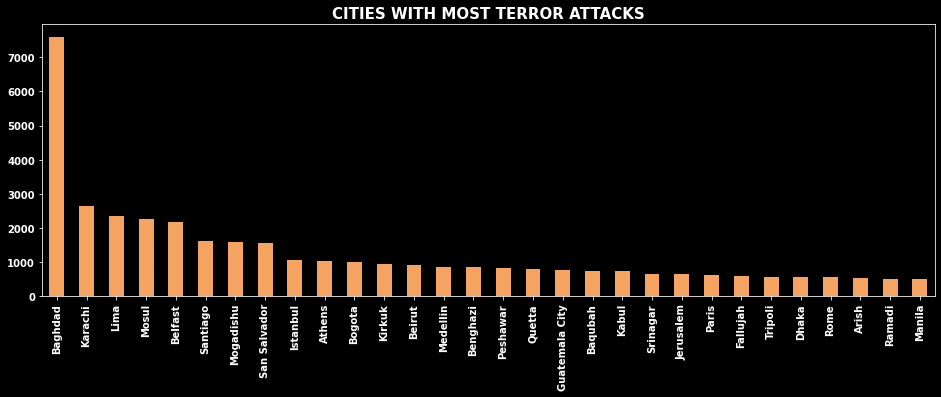

In [23]:
city_df=terror_new[terror_new['city']!="Unknown"]
plt.style.use('dark_background')
city_df['city'].value_counts().head(30).plot.bar(color="#F4A460",figsize=(16,5))
plt.title("CITIES WITH MOST TERROR ATTACKS",fontdict={'color':"white","fontsize":15,'fontweight':'bold'})
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

Baghdad , Karachi , Lima , Mosul , Belfast are cities where most terrorist attacks have occurred.


(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.,
        80000., 90000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

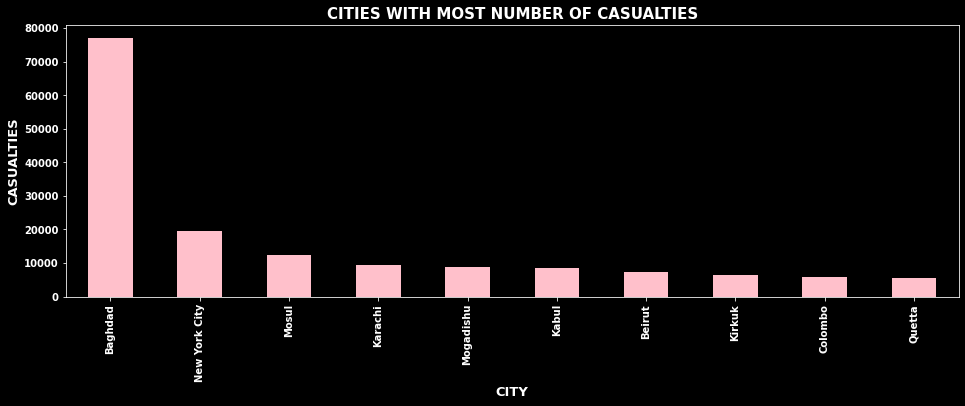

In [24]:
plt.style.use('dark_background')
city_df.groupby(['city'])['Casualties'].sum().sort_values(ascending=False).head(10).plot.bar(color="pink",figsize=(16,5))
plt.title("CITIES WITH MOST NUMBER OF CASUALTIES",fontdict={'color':"white","fontsize":15,'fontweight':'bold'})
plt.ylabel('CASUALTIES',fontdict={'color':"white","fontsize":13,'fontweight':'bold'})
plt.xlabel('CITY',fontdict={'color':"white","fontsize":13,'fontweight':'bold'})
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

REGIONAL ANALYSIS

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([    0., 10000., 20000., 30000., 40000., 50000., 60000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

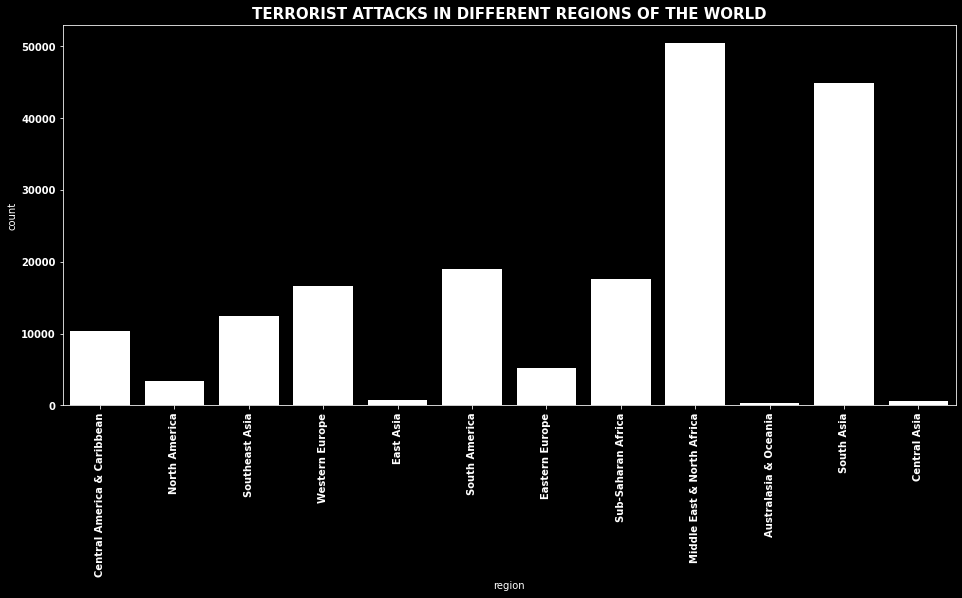

In [25]:
plt.style.use('dark_background')
plt.subplots(figsize=(16,7))
sns.countplot(terror_new['region'],color='white')
plt.title("TERRORIST ATTACKS IN DIFFERENT REGIONS OF THE WORLD",fontdict={'color':"white","fontsize":15,'fontweight':'bold'})
plt.xticks(fontweight='bold',rotation=90)
plt.yticks(fontweight='bold')

C:\Users\Aman Kumar Singh\AppData\Local\Temp/ipykernel_17472/1928611440.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  terror_new.groupby(['region'])['killed','wounded'].sum().plot.bar(color=['#FF1493','green'],figsize=(16,7))


(array([     0.,  50000., 100000., 150000., 200000., 250000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

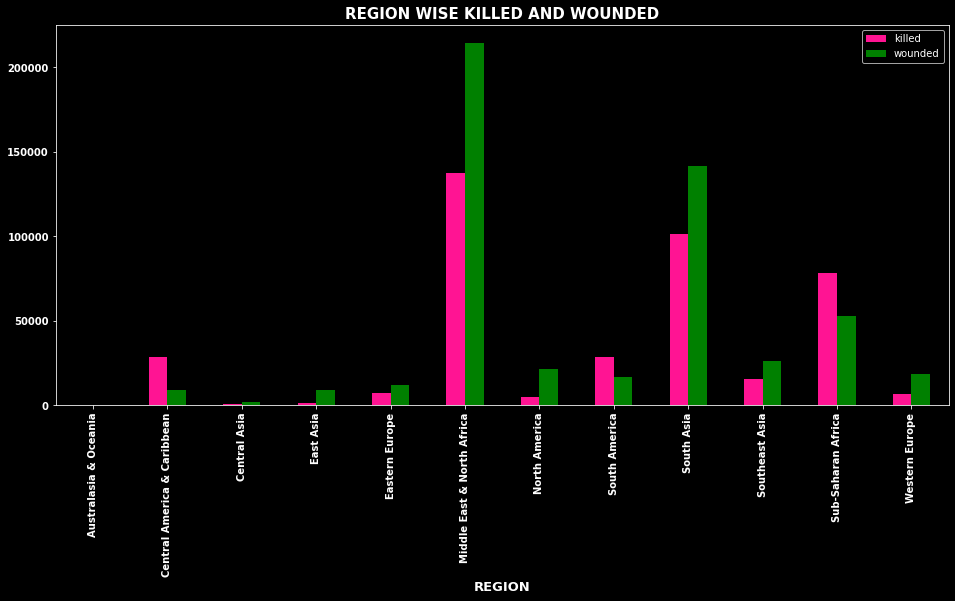

In [26]:
plt.style.use('dark_background')
terror_new.groupby(['region'])['killed','wounded'].sum().plot.bar(color=['#FF1493','green'],figsize=(16,7))
plt.title("REGION WISE KILLED AND WOUNDED",fontdict={'color':"white","fontsize":15,'fontweight':'bold'})
plt.xlabel("REGION",fontdict={'color':"white","fontsize":13,'fontweight':'bold'})
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

ATTACK TYPE AND WEAPON TYPE ANALYSIS

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

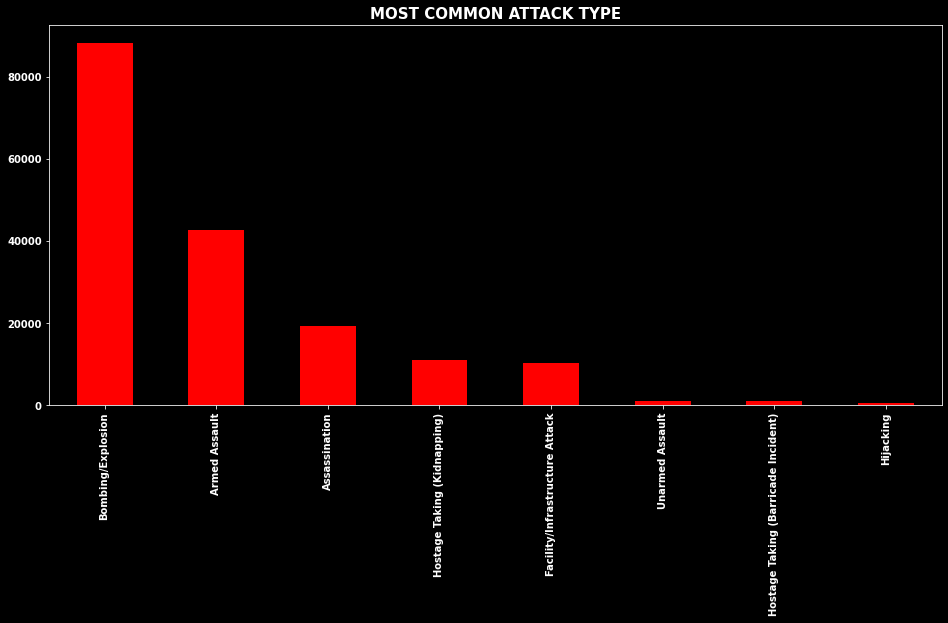

In [27]:
attack_df=terror_new[terror_new['attacktype']!="Unknown"]
plt.style.use('dark_background')
attack_df['attacktype'].value_counts().plot.bar(figsize=(16,7),color='#FF0000')
plt.title("MOST COMMON ATTACK TYPE",fontdict={'color':"white","fontsize":15,'fontweight':'bold'})
plt.xticks(fontweight='bold',rotation=90)
plt.yticks(fontweight='bold')

Bombing/Explosion, Armed Assault and Assassination are the most common type of Terrorist Attacks.

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

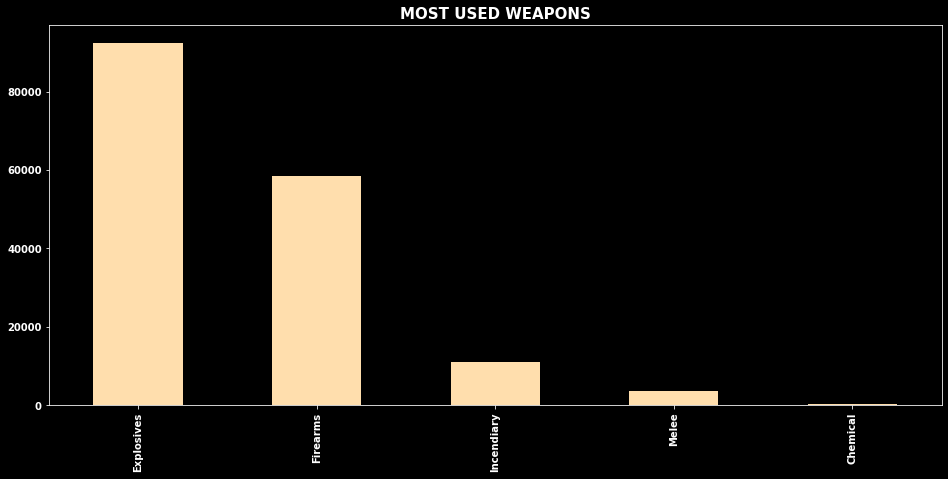

In [28]:
weapon_df=terror_new[terror_new['weapon']!="Unknown"]
plt.style.use('dark_background')
weapon_df['weapon'].value_counts().head(5).plot.bar(figsize=(16,7),color='#FFDEAD')
plt.title("MOST USED WEAPONS",fontdict={'color':"white","fontsize":15,'fontweight':'bold'})
plt.xticks(fontweight='bold',rotation=90)
plt.yticks(fontweight='bold')

Explosives , Firearms , Incendiary are the most used weapons.

In [29]:
country_list=terror_new.loc[terror_new['country'].isin(terror_new['country'].value_counts().nlargest(10).index.to_list())]
pd.crosstab(country_list['country'],country_list['attacktype'])

attacktype,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
country,,,,,,,,,
Afghanistan,2877,954,6245,355,16,27,1011,73,1173
Colombia,1972,1343,3128,275,33,89,1058,14,394
El Salvador,2216,449,2055,194,0,117,154,1,134
India,3184,1229,4825,996,43,44,1184,143,312
Iraq,3155,1287,18286,154,13,24,946,6,765
Pakistan,3859,1406,7613,300,19,35,823,77,236
Peru,1328,1002,3115,223,8,74,97,4,245
Philippines,2158,1099,2213,452,34,53,602,4,293
Turkey,1289,437,1957,279,13,13,158,10,136


In [30]:
pd.crosstab(terror_new['region'],weapon_df['weapon'])

weapon,Biological,Chemical,Explosives,Fake Weapons,Firearms,Incendiary,Melee,Other,Radiological,Sabotage Equipment,"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)"
region,,,,,,,,,,,
Australasia & Oceania,0,11,80,0,74,74,10,1,0,0,1
Central America & Caribbean,0,2,3149,0,5679,435,65,0,0,5,4
Central Asia,0,2,254,1,232,15,14,0,0,0,0
East Asia,2,17,333,4,41,252,82,3,10,3,8
Eastern Europe,0,12,3089,4,1461,186,90,4,0,4,1
Middle East & North Africa,1,73,32283,6,11877,1181,1227,23,0,10,69
North America,24,26,1557,5,682,897,74,18,1,19,15
South America,1,26,9098,3,6525,1077,131,6,0,15,3
South Asia,2,83,22568,3,15169,2285,998,16,1,46,15


1.North American Region has faced more number of Biological weaponed Attacks.
2.South Asia , Middle East & North Africa and Western Europe has more number of Chemical weaponed Attacks.
3.Nearly 10 Radiological Attacks have occurred in East Asia.

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

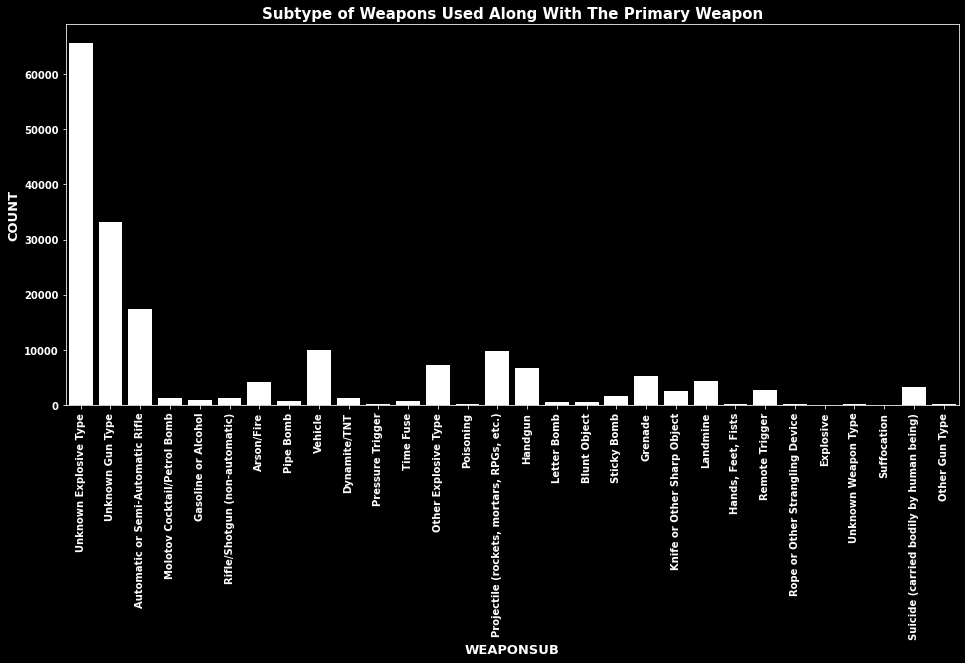

In [31]:
plt.style.use('dark_background')
plt.subplots(figsize=(16,7))
sns.countplot(terror_new['weaponsub'],color='white')
plt.title("Subtype of Weapons Used Along With The Primary Weapon",fontdict={'color':"white","fontsize":15,'fontweight':'bold'})
plt.xlabel('WEAPONSUB',fontdict={'color':"white","fontsize":13,'fontweight':'bold'})
plt.ylabel('COUNT',fontdict={'color':"white","fontsize":13,'fontweight':'bold'})
plt.xticks(rotation=90,fontweight='bold')
plt.yticks(fontweight='bold')

We can see that there are various kinds of Subtypes of weapons Explosives, Guns, Rifles, Vehicles and Projectiles are most commonly paired with the first choice of weapon

GROUP WISE ANALYSIS

Text(0.5, 1.0, 'GROUPS WITH HIGHEST NUMBER OF ATTACKS')

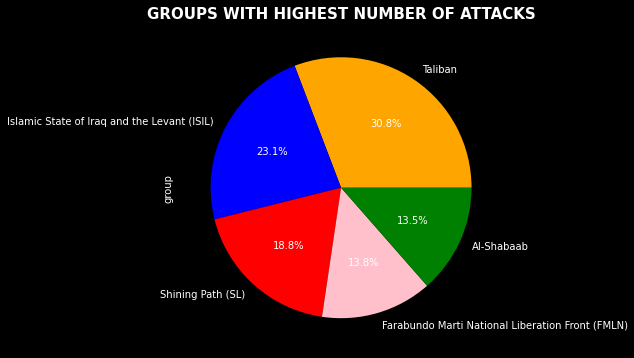

In [32]:
group_df=terror_new[terror_new['group']!='Unknown']
plt.style.use('dark_background')
group_df['group'].value_counts().head().plot.pie(figsize=(12,6),autopct="%.1f%%",colors=["orange",'blue','red','pink','green'])
plt.title("GROUPS WITH HIGHEST NUMBER OF ATTACKS",fontdict={'color':"white","fontsize":15,'fontweight':'bold'})

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000., 35000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

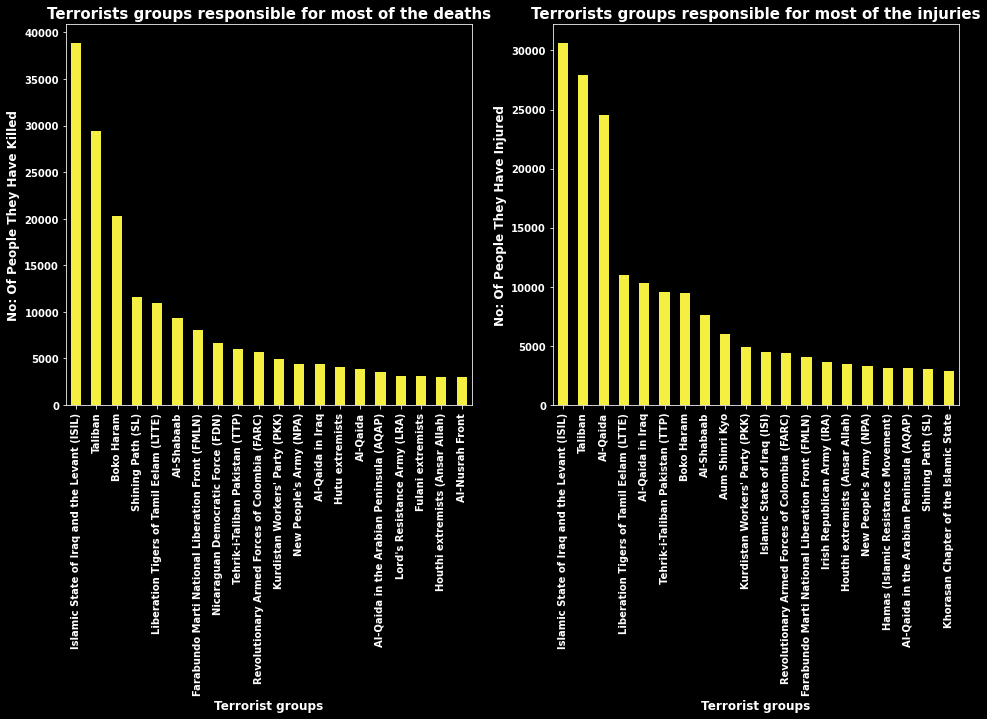

In [33]:
plt.style.use('dark_background')
plt.subplot(1,2,1)
group_df.groupby(['group'])['killed'].sum().sort_values(ascending=False).head(20).plot.bar(figsize=(16,7),color='#f5ef42')
plt.ylabel("No: Of People They Have Killed",fontdict={'color':"white","fontsize":12,'fontweight':'bold'})
plt.xlabel("Terrorist groups",fontdict={'color':"white","fontsize":12,'fontweight':'bold'})
plt.title("Terrorists groups responsible for most of the deaths",fontdict={'color':"white","fontsize":15,'fontweight':"bold"})
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.subplot(1,2,2)
group_df.groupby(['group'])['wounded'].sum().sort_values(ascending=False).head(20).plot.bar(figsize=(16,7),color='#f5ef42')
plt.ylabel("No: Of People They Have Injured",fontdict={'color':"white","fontsize":12,'fontweight':'bold'})
plt.xlabel("Terrorist groups",fontdict={'color':"white","fontsize":12,'fontweight':'bold'})
plt.title("Terrorists groups responsible for most of the injuries",fontdict={'color':"white","fontsize":15,'fontweight':"bold"})
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

Hot Zones Of Terrorism

 Iraq has one of the highest terror attacks and it is one of the prominent countries from the middle east. Baghdad is the capital of Iraq.Till this date Iraq is constantly at war. Many number of wars have taken place since 2017. The main targets also make sense since people are killed,property gets damaged from fire and explosions, and military are more likely to get attacked since its a war between groups and countries.
 
Pakistan and its previous capital Karachi also face most of the terrorism, the attacks are mostlty bombings and Armed Assault which caused loss of people and Educational Institutions.

Afghanistan is the second highest country with highest fatalities and casualities.

India has suffered about 47000 casualities due to terrorism and Srinagar city of India is in top 30 attacked cities.

Analysis

Terrorist organizations have long threatened the security, infrastructue, and citizens of nations and communities throughout the world. Counter- terrorism, incorporates the practice, military tactics, techniques and strategies are used by government and intelligence agencies to prevent terrorism.